## Titanic Survival Prediction (Logistic Regression)

The Titanic dataset is one of the most popular datasets used in data science and machine learning. It contains information about the passengers who were on board the Titanic when it sank in 1912. The goal is to predict whether a passenger survived or not based on their details.

The dataset contains information about passengers aboard the RMS Titanic, including:

- **PassengerId:** Unique identifier for each passenger.
- **Survived:** Survival status (0 = No, 1 = Yes)-----> Target column
- **Pclass:** Ticket class/Social and economic status (1st = Upper, 2nd = Middle, 3rd = Lower). 
- **Name:** Passenger's name.
- **Sex:** Gender.
- **Age:** Age in years.
- **SibSp:** Number of siblings/spouses aboard.
- **Parch:** Number of parents/children aboard.
- **Ticket:** Ticket number.
- **Fare:** The ticket price.
- **Cabin:** Cabin number.
- **Embarked:** Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

This dataset is useful for classification tasks because it provides real-world data with a mix of missing values, categorical variables, and numerical features, making it a good case study for data preprocessing, feature engineering, and machine learning model building.

### Logistic Regression: 

In this project, we use **Logistic Regression** as our first machine learning model. Logistic Regression is a simple yet powerful algorithm widely used for **binary classification** problems, where the target variable has only two outcomes. In the Titanic dataset, the target is Survived (1 = Yes, 0 = No), which makes Logistic Regression a suitable choice.

The algorithm works by estimating the probability of survival using a **sigmoid function**, which maps values between 0 and 1. Based on a threshold (commonly 0.5), the model classifies passengers into either **survived or not survived**.

Logistic Regression is chosen at the start because:

- It is **easy to interpret** (we can understand the impact of each feature).
- It provides a **baseline model** to compare with more advanced algorithms later.
- It works well when the relationship between predictors and the outcome is mostly linear.

### Import required libraries

In [312]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

### 1. Data Understanding:

#### A. Read the CSV file

In [313]:
titanic = pd.read_csv("Titanic-Dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### B. Print shape and Column of the dataset

In [314]:
print("Shape of the dataset: ",titanic.shape)
print()
print("Columns present in the dataset: \n", titanic.columns)

Shape of the dataset:  (891, 12)

Columns present in the dataset: 
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


#### Observation:
- There are 891 rows and 12 columns present in the dataset

#### C. Information about the dataset

In [315]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Observation:
- There are **5 integer** data types, **5 categorical data types**, and **2 float** data types present in the dataset.
- We need to convert the Age column from float to integer data type.
- There are missing values present in the **"Age"**, **"Embarked"** and **"Cabin"** columns.
- We need to convert the Age column's data type from float to integer.
- **"Survived"** column is the dependent/target column.
- **PassengerId, Ticket, Fare** column can be dropped letter as it adds no value to the model.

#### D. Check for missing values

In [316]:
missing_values = titanic.isnull().sum()
print("Missing values: \n", missing_values)

Missing values: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [317]:
missing_percentage = (missing_values/len(titanic))*100
print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


#### Observation:
- We will use the median to remove missing values in the "Age" column.
- We will use the mode to remove missing values in the "Embarked" column.
- We will create 2 new features, "CabinKnown" and "CabinLetter".
- Later, we will drop the original Cabin column as it can create noise.

#### E. Impute missing values

##### Age column

In [318]:
## impute missing values in "Age" column with median
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

In [319]:
# Convert the age data type from float to integer
titanic["Age"] = titanic["Age"].astype(int)

#### Observation:
- We have imputed the missing values in Age with Median.

##### Embarked column

In [320]:
# Fill missing values in Embarked with the most frequent value (mode)
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])

#### Observation:
- We have imputed the missing values in Embarked with Mode.

##### Cabin column - Feature engineering + dropping the Cabin column

In [321]:
# 1. Create a new feature: CabinKnown (1 if Cabin present, 0 if missing)
titanic['CabinKnown'] = titanic["Cabin"].notnull().astype(int)

# 2. Extract the first letter of Cabin (e.g., 'C85' -> 'C')
titanic["CabinLetter"] = titanic["Cabin"].astype(str).str[0]
# Fill missing with 'U' (Unknown)
titanic["CabinLetter"] = titanic["CabinLetter"].replace('n','U')  # replace 'nan' -> 'U'

In [322]:
# Now let's drop  the "Cabin" column
titanic1= titanic.drop("Cabin", axis=1) 

#### Observation:
- We created 2 new features from the Cabin column:
   - CabinKnown → 1 if the cabin is present, 0 if missing.
   - CabinLetter → the first letter of the cabin.
- We then dropped the original Cabin column.

#### F. Check for duplicate values

In [323]:
duplicates = titanic1.duplicated().sum()
print(duplicates)

0


#### Observation:
- There are no duplicate values present in the dataset.

#### G. Statistical summary

In [324]:
stats_summary = titanic1.describe()
print(stats_summary)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.345679    0.523008   
std     257.353842    0.486592    0.836071   13.028212    1.102743   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  CabinKnown  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    0.228956  
std      0.806057   49.693429    0.420397  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.910400    0.000000  
50%      0.000000   14.454200    0.000000  
75%      0.000000   31.000000    0.000000  
max      6.000000

#### Observation:
1. Survived
      - Mean = 0.384 → ~38% survived, ~62% did not.
      - Confirms class imbalance (not extreme)

2. Pclass
      - Mean = 2.31 → majority passengers were in 2nd & 3rd class.
      - Survival odds are strongly correlated with Pclass (1st class had higher chance).

3. Age
    - Range: 0 → 80 years.
    - Median = 28, IQR = 22 → 35.
    - Std = 13.0 → good variability preserved after imputation.
    - Most passengers were young adults.

4. SibSp & Parch (family features)
    - Most passengers had no siblings/spouses (SibSp=0) and no parents/children (Parch=0).
    - Mean SibSp = 0.52, Mean Parch = 0.38.
    - A few passengers had very large families (max SibSp=8, max Parch=6).
      
5. Fare
    - Range: 0 → 512 (highly skewed).
    - Median = 14.45, mean = 32.2 → shows right-skew.
      
6. CabinKnown
    - Mean = 0.229 → ~23% passengers had a recorded cabin, 77% did not.
    - Likely correlates with wealth → should help model.

### 2. Feature Engineering

#### A. Let's drop unwanted columns

In [325]:
# Drop PassangerId
titanic_2= titanic1.drop(["PassengerId"], axis=1, inplace=True)

In [326]:
# Drop Name
titanic_2 = titanic1.drop(["Name"], axis=1)

In [327]:
titanic_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinKnown,CabinLetter
0,0,3,male,22,1,0,A/5 21171,7.2500,S,0,U
1,1,1,female,38,1,0,PC 17599,71.2833,C,1,C
2,1,3,female,26,0,0,STON/O2. 3101282,7.9250,S,0,U
3,1,1,female,35,1,0,113803,53.1000,S,1,C
4,0,3,male,35,0,0,373450,8.0500,S,0,U


#### Observation:
- We have dropped the "Passenger_id" and "Name"(Sex is sufficient to know the gender of the passengers) columns as they add no value to the model.

#### B. Create a new column "TicketFreq" and drop the original "Ticket" column.

In [328]:
titanic_2["TicketFreq"] = titanic_2.groupby("Ticket")["Ticket"].transform("count")

In [329]:
# drop the original "Ticket" column.
titanic_2 = titanic_2.drop(["Ticket"], axis= 1)

#### Observation:
- Ticket frequency captures whether a passenger was traveling alone or as part of a group/family, which can influence survival odds.

#### 3. Data Exploration and Analysis:

#### A. Check for unexpected values in each categorical variable and impute with best suitable value.

In [330]:
for col in titanic_2.columns:
    print(f"The unique values in {col}:")
    print(titanic_2[col].unique())
    print("----------------------\n")

The unique values in Survived:
[0 1]
----------------------

The unique values in Pclass:
[3 1 2]
----------------------

The unique values in Sex:
['male' 'female']
----------------------

The unique values in Age:
[22 38 26 35 28 54  2 27 14  4 58 20 39 55 31 34 15  8 19 40 66 42 21 18
  3  7 49 29 65  5 11 45 17 32 16 25  0 30 33 23 24 46 59 71 37 47 70 12
  9 36 51 44  1 61 56 50 62 41 52 63 43 60 10 64 13 48 53 57 80  6 74]
----------------------

The unique values in SibSp:
[1 0 3 4 2 5 8]
----------------------

The unique values in Parch:
[0 1 2 5 3 4 6]
----------------------

The unique values in Fare:
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292 

#### Observation:
There are no unexpected values present in the columns.

#### 3.1. Univarient Analysis

#### A. Visualize distribution of all the categorical variables and clearly share insights

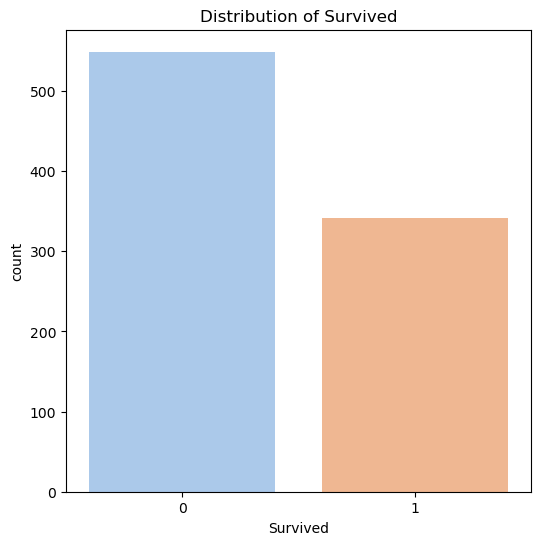

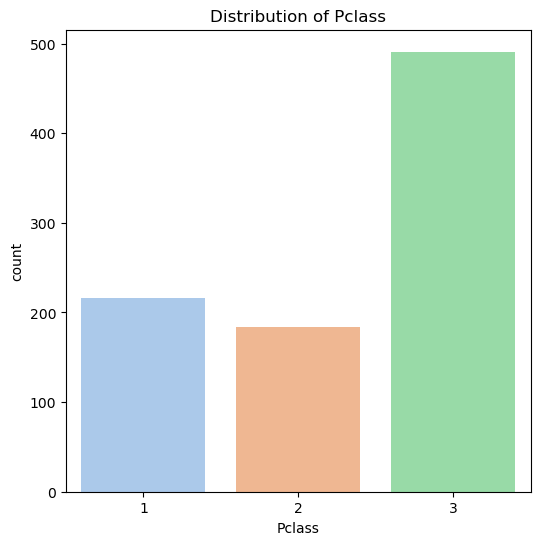

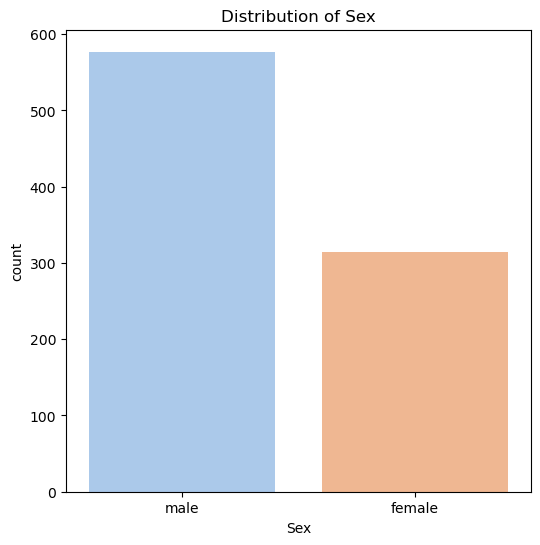

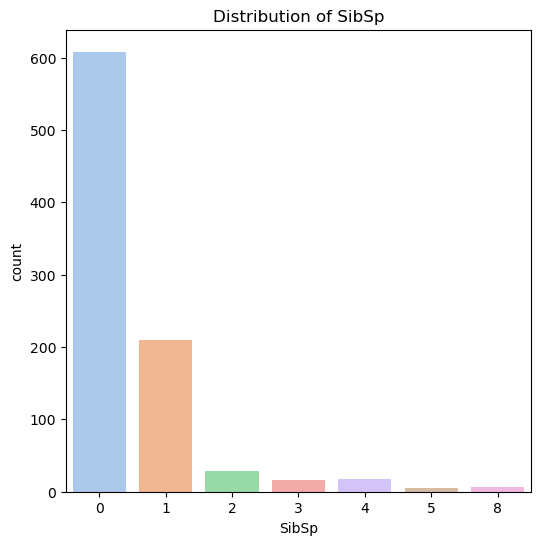

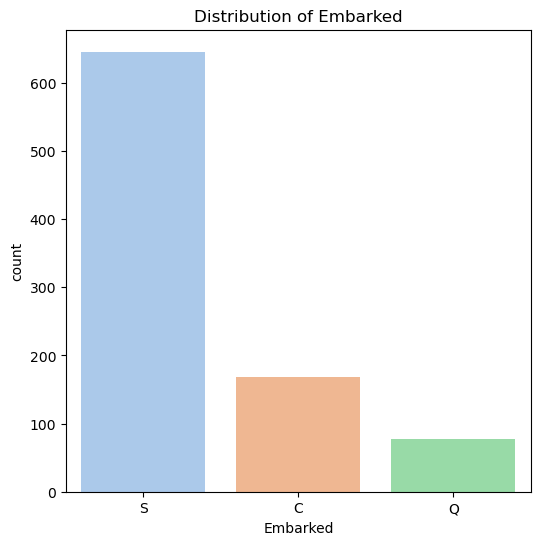

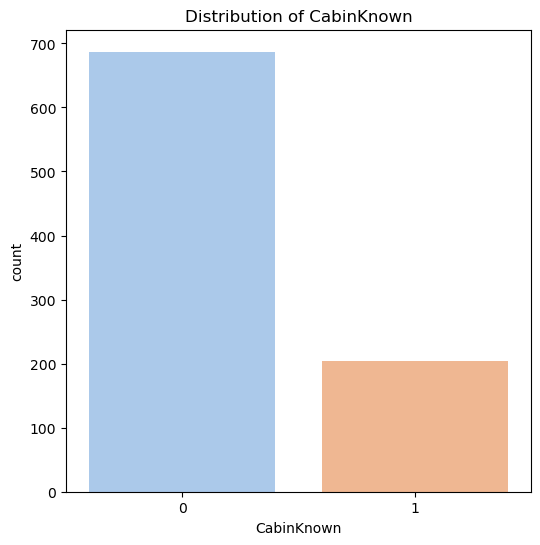

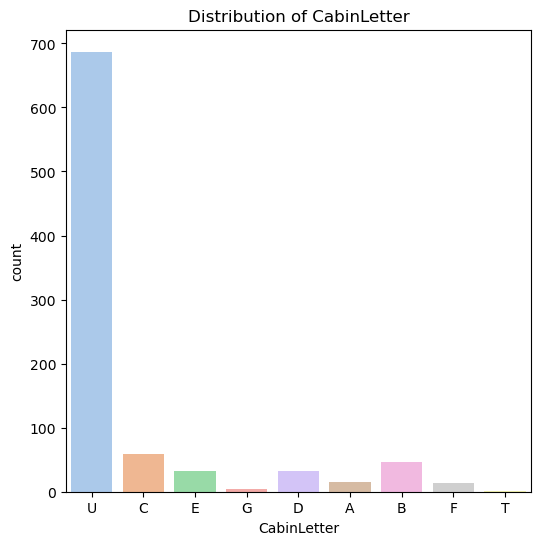

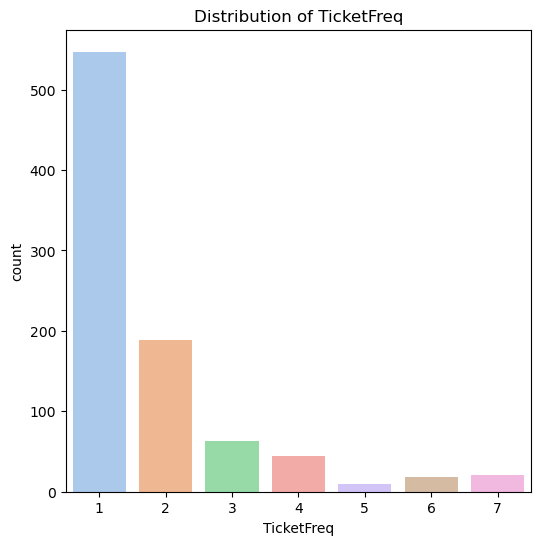

In [331]:
categorical_col = ["Survived","Pclass", "Sex","SibSp", "Embarked", "CabinKnown", "CabinLetter","TicketFreq"]

for col in categorical_col:
    plt.figure(figsize=(6,6))
    sns.countplot(data = titanic_2, x = col, palette="pastel")
    plt.title(f"Distribution of {col}")
    plt.show()

#### Observation:
- **Survived:** The column is imbalanced, with more than 500 passengers who did not survive and fewer than 400 who did. We will proceed with a method to balance the dataset later.
- **Pclass:** Most of the passengers on the ship were from Third Class, followed by fewer than 250 passengers in First Class and fewer than 200 in Second Class.
- **Sex:** There were more than 550 male passengers and fewer than 400 female passengers on the ship.
- **SibSp:** The majority of passengers (~68%) had no siblings/spouses aboard, about 23% traveled with one sibling/spouse, and very few had larger family groups (≥2).
- **Parch:** Most passengers (~76%) traveled without parents/children, while a smaller portion had 1–2 family members. Very few passengers traveled with larger families (≥3).
- **Embarked:** More than 600 passengers embarked from Southampton (S), followed by fewer than 200 from Cherbourg (C), and fewer than 100 from Queenstown(Q).
- **CabinKnown:** There are more than 600 unknown cabin numbers and around 200 known cabin numbers.
- **CabinLetter:** Most passengers (~77%) have unknown cabins (U), while among known ones, C, B, D, and E are the most common, indicating higher occupancy in midship decks.
- **TicketFreq:** Most passengers (547) traveled alone on unique tickets, while a significant number shared tickets with 2–3 people. Larger groups (4–7 passengers per ticket) were much less common.

#### B. Visualize the distribution of the Age column and clearly share insights

C:\Users\reshm\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


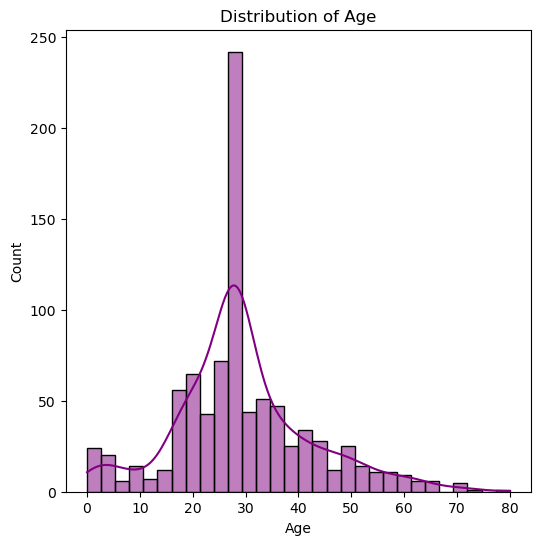

In [332]:
plt.figure(figsize=(6,6))
sns.histplot(data = titanic_2, x = "Age", kde= True, color= "purple")
plt.title("Distribution of Age")
plt.show()

#### Observation:
- The Age distribution is right-skewed, with most passengers between 20–35 years old. The spike at 28 is due to missing values being imputed with the median. Fewer children (<10) and elderly passengers (>60) were aboard.
- This suggests young adults made up the bulk of passengers, while children and elderly were a small minority.

#### C. Visualize the distribution of the Fare column and clearly share insights

C:\Users\reshm\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


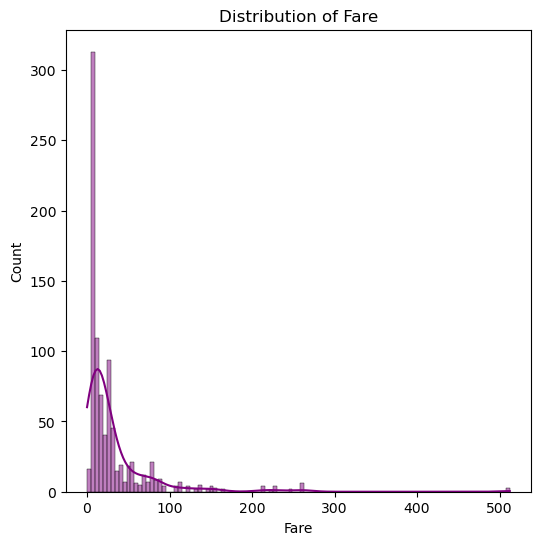

In [333]:
plt.figure(figsize=(6,6))
sns.histplot(data = titanic_2, x = "Fare", kde= True, color= "purple")
plt.title("Distribution of Fare")
plt.show()

#### Observation:
- The Fare distribution is highly right-skewed — most passengers paid relatively low fares (under 50), while a few paid very high fares (up to 500). This reflects the difference between lower-class and upper-class tickets, with extreme outliers from wealthy first-class passengers.
- Indicates that Fare is an important feature for distinguishing socio-economic class and survival chances.
- Let's create a log-transformed fare to reduce skewness so that it helps the model, logistic regression, handle the feature better.

#### D. Visualize the outliers present in the Fare column using a boxplot

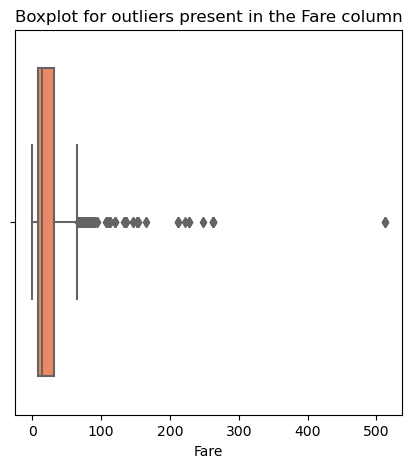

In [334]:
plt.figure(figsize=(5,5))
sns.boxplot(data=titanic_2, x="Fare", color = "coral")
plt.title("Boxplot for outliers present in the Fare column")
plt.show()

#### Observation:
The Fare variable is highly right-skewed, with most passengers paying low fares and a few wealthy passengers paying very high fares (genuine outliers). Higher fares are strongly linked to 1st class travel, which in turn shows better survival chances.

In [335]:
# create a log-transformed fare to reduce skewness
titanic_2['Fare_log'] = np.log1p(titanic_2['Fare'])

#### Observation:
- The extreme high fares are compressed, making the feature more normally distributed.
- Helps the model like logistic regression handle the feature better.
- Preserves the relationship with survival: higher fares still correspond to higher survival chances, but without letting extreme values dominate the model.
- Let's drop the original 'Fair' column going further.

In [336]:
# Drop the original Fare column
titanic_2 = titanic_2.drop(columns=['Fare'])

#### 3.2. Bivarient Analysis 

#### A. Sex vs Survived

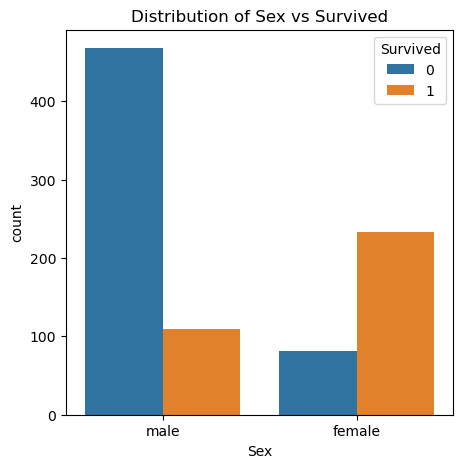

In [337]:
plt.figure(figsize=(5,5))
sns.countplot(data=titanic_2,x="Sex", hue="Survived")
plt.title("Distribution of Sex vs Survived")
plt.show()

#### Observation:
- **Males:** More than 400 male passengers did not survive, while only about 100 survived.
- **Females:** Fewer than 100 female passengers did not survive, while over 200 survived.
- This confirms that females had a much higher survival rate than males.

#### B. Pclass vs Survived

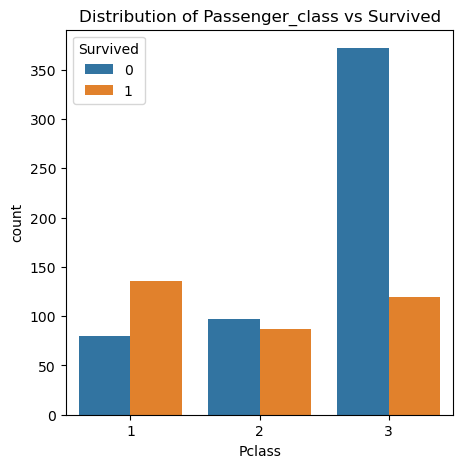

In [338]:
plt.figure(figsize=(5,5))
sns.countplot(data=titanic_2,x="Pclass", hue="Survived")
plt.title("Distribution of Passenger_class vs Survived")
plt.show()

#### Observation:
- Survival strongly depended on passenger class — 
    - **1st Class:** More survived (136) than died (80).
    - **2nd Class:** Survival (87) and deaths (97) were almost balanced.
    - **3rd Class:** Most died (372) compared to relatively few survivors (119).
- Higher-class passengers had a much better chance of survival.

#### C. SibSp vs Survived

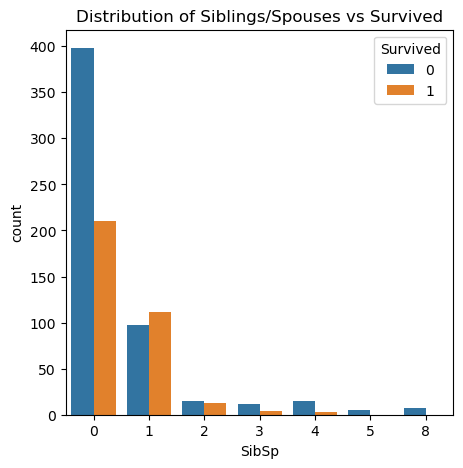

In [339]:
plt.figure(figsize=(5,5))
sns.countplot(data=titanic_2,x="SibSp", hue="Survived")
plt.title("Distribution of Siblings/Spouses vs Survived")
plt.show()

#### Observation:
- **SibSp = 0:** Many traveled alone; survival rate moderate.
- **SibSp = 1:** Highest survival rate.
- **SibSp ≥ 3:** Survival rate drops significantly.
- Very large families (SibSp 5–8): Very low survival.

In [340]:
titanic_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,CabinKnown,CabinLetter,TicketFreq,Fare_log
0,0,3,male,22,1,0,S,0,U,1,2.110213
1,1,1,female,38,1,0,C,1,C,1,4.280593
2,1,3,female,26,0,0,S,0,U,1,2.188856
3,1,1,female,35,1,0,S,1,C,2,3.990834
4,0,3,male,35,0,0,S,0,U,1,2.202765


#### D. Parch vs Survived 

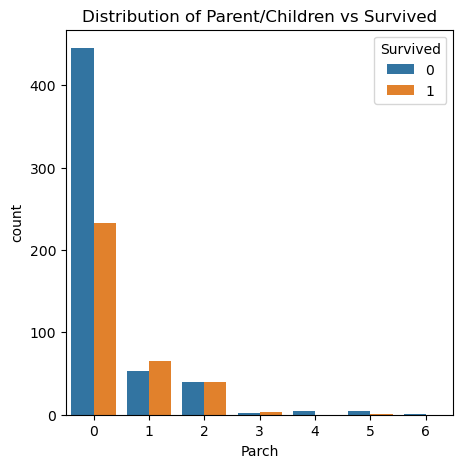

In [341]:
plt.figure(figsize=(5,5))
sns.countplot(data=titanic_2,x="Parch", hue="Survived")
plt.title("Distribution of Parent/Children vs Survived")
plt.show()

#### Observation: 
- **Parch = 0:** Most passengers traveled without parents/children; survival rate moderate.
- **Parch = 1:** Slightly higher survival rate than alone.
- **Parch = 2:** Balanced survival and non-survival (50% survival).
- **Parch = 3–4:** Small groups; survival rate varies but numbers are low.
- **Parch ≥ 5:** Very few passengers; survival rate very low.
- **Key insight:** Traveling with 1–2 parents/children slightly increased survival chances, while large groups (Parch ≥ 3) had lower survival rates.


#### E. Embarked vs Survived

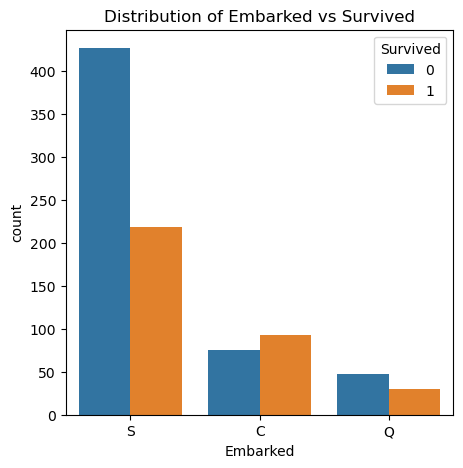

In [342]:
plt.figure(figsize=(5,5))
sns.countplot(data=titanic_2,x="Embarked", hue="Survived")
plt.title("Distribution of Embarked vs Survived")
plt.show()

#### Observation:
- **C (Cherbourg):** More passengers survived than died.
- **Q (Queenstown):** More passengers died than survived.
- **S (Southampton):** Majority of passengers; survival rate lower than C.
- **Key insight:** Passengers who embarked at Cherbourg (C) had the highest survival rate, while those from Southampton (S) had lower survival.

In [343]:
titanic_2.groupby(["TicketFreq", "Survived"]).size()

TicketFreq  Survived
1           0           384
            1           163
2           0            80
            1           108
3           0            19
            1            44
4           0            22
            1            22
5           0            10
6           0            18
7           0            16
            1             5
dtype: int64

#### F. CabinKnown vs Survived

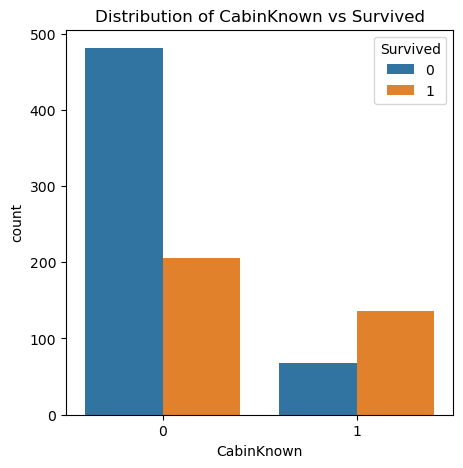

In [344]:
plt.figure(figsize=(5,5))
sns.countplot(data=titanic_2,x="CabinKnown", hue="Survived")
plt.title("Distribution of CabinKnown vs Survived")
plt.show()

#### Observation:
- **CabinKnown = 1 (cabin known):** Higher survival rate (136 survived vs 68 died).
- **CabinKnown = 0 (cabin unknown):** Lower survival rate (206 survived vs 481 died).
- **Key insight:** Passengers with a known cabin number had a much higher chance of survival, possibly indicating higher-class passengers or better access to lifeboats.

#### G. CabinLetter vs Survived

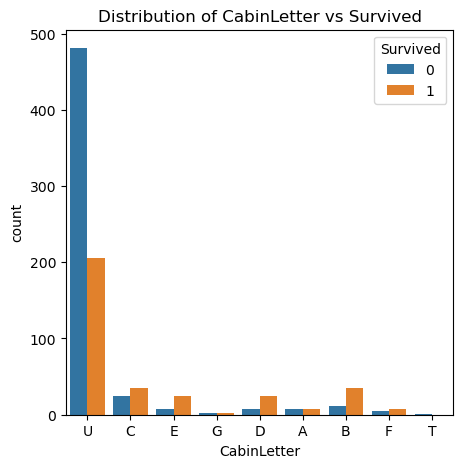

In [345]:
plt.figure(figsize=(5,5))
sns.countplot(data=titanic_2,x="CabinLetter", hue="Survived")
plt.title("Distribution of CabinLetter vs Survived")
plt.show()

#### Observation:
- **B, C, D, E cabins:** More passengers survived than died → higher survival, likely higher-class cabins.
- **A, F, G cabins:** Survival roughly balanced or low numbers.
- **T cabin:** Only 1 passenger, died → negligible.
- **U (unknown):** Majority died (206 survived vs 481 died) → unknown cabins had lower survival.
- **Key insight:** Survival was higher for passengers in B–E cabins, while unknown cabins (U) had the lowest survival. This reflects class and access to lifeboats.

#### G. Ticket frequency vs Survived

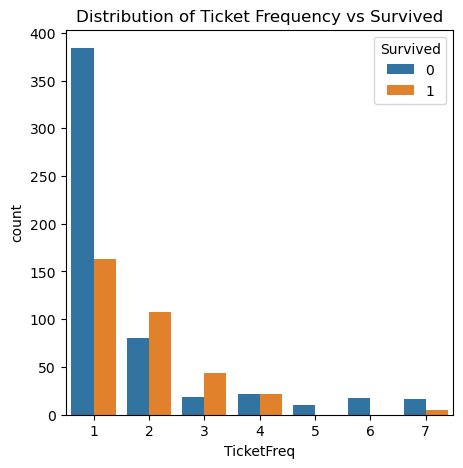

In [346]:
plt.figure(figsize=(5,5))
sns.countplot(data=titanic_2,x="TicketFreq", hue="Survived")
plt.title("Distribution of Ticket Frequency vs Survived")
plt.show()

#### Observation:
- **TicketFreq = 1 (solo ticket):** Most common; survival rate lower.
- **TicketFreq = 2–3:** Higher survival rate than solo travelers.
- **TicketFreq = 4:** Balanced survival (22 survived, 22 died).
- **TicketFreq ≥ 5:** Very few passengers; survival low or negligible.
- **Key insight:** Traveling with 1–2 others sharing the same ticket slightly improved survival, while solo travelers or very large ticket groups had lower survival chances.

#### 3.3. Multivarient Analysis

#### A. Survival by Class & Sex

<Figure size 500x500 with 0 Axes>

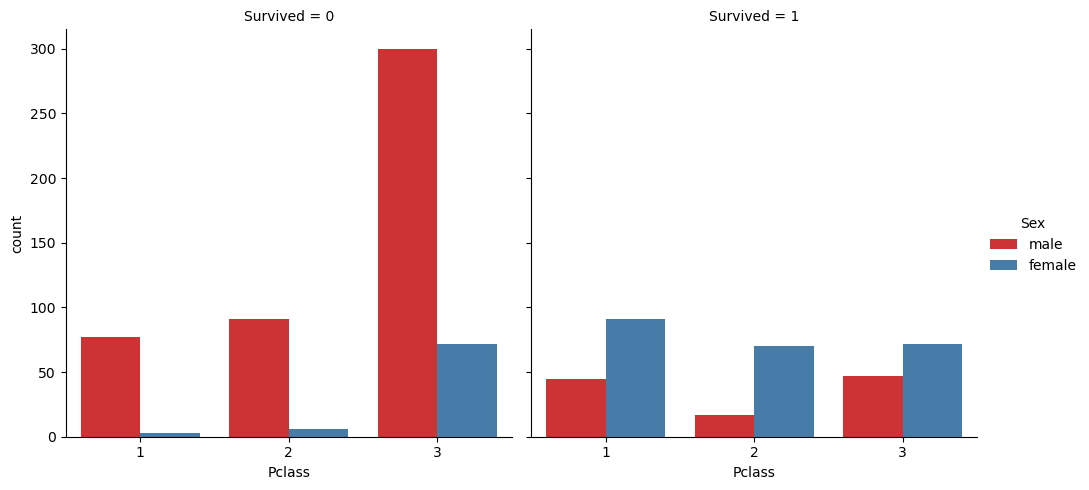

In [347]:
plt.figure(figsize=(5,5))
sns.catplot(data=titanic_2 , x="Pclass", hue="Sex", col="Survived", kind="count", palette="Set1")
plt.show()

#### Observation:
- 1st and 2nd class women had the best survival chances.
- 3rd class women survived more than 3rd class men but still at lower rates.
- 3rd class men had the lowest survival rate of all groups.

Females in higher classes had the best survival, while males in 3rd class had the worst.

#### B. Survival by Age, Sex & Class

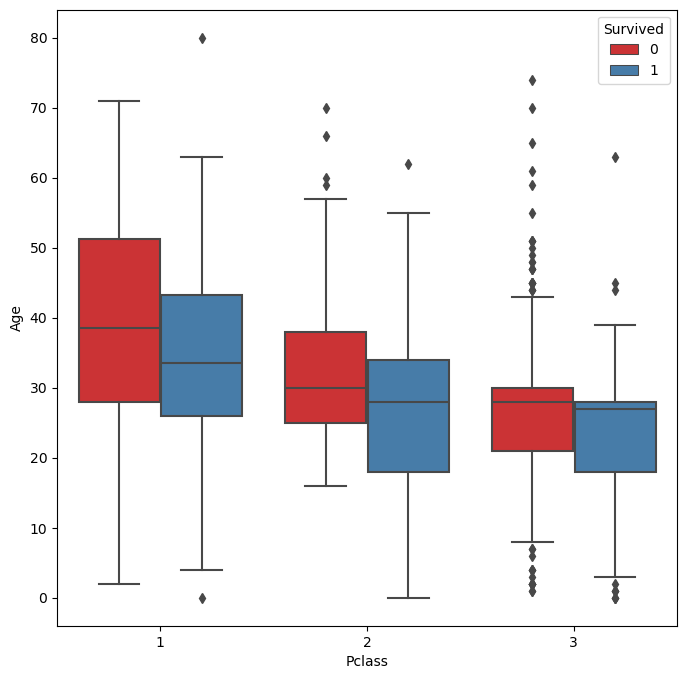

In [348]:
plt.figure(figsize=(8,8))
sns.boxplot(data=titanic_2, x="Pclass", y="Age", hue="Survived", palette="Set1")
plt.show()

#### Observation:
- Females had higher survival across all classes, especially 1st and 2nd class.
- 3rd class females had lower survival chances compared to higher classes.
- Males across all ages and classes had much lower survival rates, with very few surviving outside 1st class children.
- Children (younger age groups), especially girls, had relatively better survival compared to adults.

#### D. Survival by Family Size

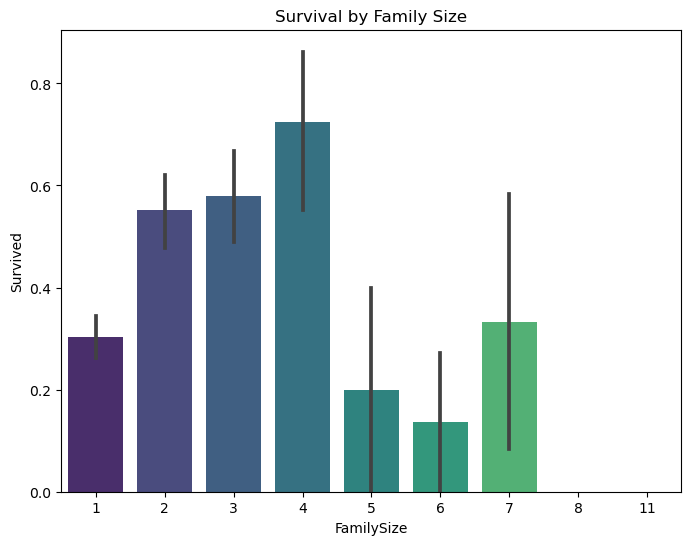

In [349]:
titanic_2["FamilySize"] = titanic_2["SibSp"] + titanic_2["Parch"] + 1

plt.figure(figsize=(8,6))
sns.barplot(data=titanic_2, x="FamilySize", y="Survived", palette="viridis")
plt.title("Survival by Family Size")
plt.show()

#### Observation:
- Single travelers (FamilySize = 1) had lower survival rates.
- Small families (FamilySize = 2–4) had the highest survival rates.
- Large families (≥5 members) had very poor survival rates.

Traveling with a small family seems to have improved survival chances, while being alone or in very large groups reduced survival probability.

#### E. Correlation Matrix

In [350]:
# Select numerical features including target
numerical_features = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare_log', 'TicketFreq']

# Compute correlation matrix
corr_matrix = titanic_2[numerical_features].corr()
print(corr_matrix)

            Survived    Pclass     SibSp     Parch  Fare_log  TicketFreq
Survived    1.000000 -0.338481 -0.035322  0.081629  0.329862    0.038247
Pclass     -0.338481  1.000000  0.083081  0.018443 -0.661022   -0.002633
SibSp      -0.035322  0.083081  1.000000  0.414838  0.318528    0.661622
Parch       0.081629  0.018443  0.414838  1.000000  0.332186    0.593076
Fare_log    0.329862 -0.661022  0.318528  0.332186  1.000000    0.464616
TicketFreq  0.038247 -0.002633  0.661622  0.593076  0.464616    1.000000


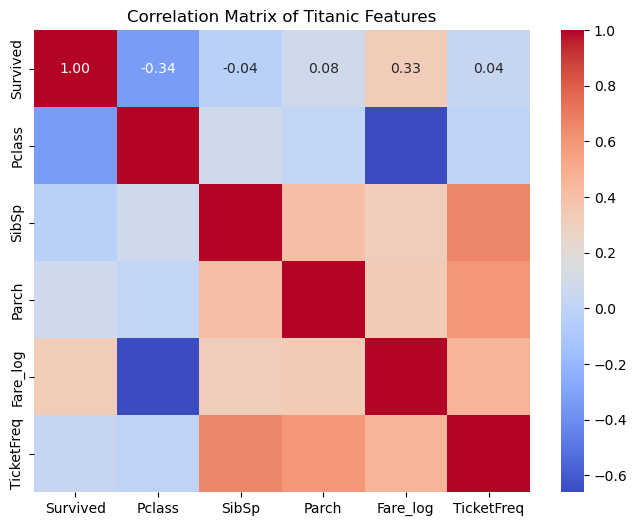

In [351]:
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Titanic Features')
plt.show()

**1. Strong predictors of survival:**
- **Pclass (-0.338):** Lower-class passengers (higher Pclass number) had lower survival.
- **Fare_log (0.33):** Higher fares increased survival chances.
- **Parch (0.08) and SibSp (-0.035):** Very weak correlations individually.

**2. Feature relationships:**
- **SibSp & Parch (0.41):** Moderate positive correlation → families traveling together.
- **Fare_log & Pclass (-0.66):** High negative correlation → higher-class passengers paid higher fares.
- **TicketFreq & SibSp/Parch (0.66 & 0.59):** Groups traveling together share tickets.

**3. Key takeaway:**
- **Most important predictors for survival:** Pclass and Fare_log.
- Family-related features (SibSp, Parch, TicketFreq) are moderately correlated with each other but have a smaller direct effect on survival.
- Fare_log helps capture the class and survival relationship while reducing skewness.

#### F. Pair plot

C:\Users\reshm\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\reshm\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\reshm\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\reshm\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

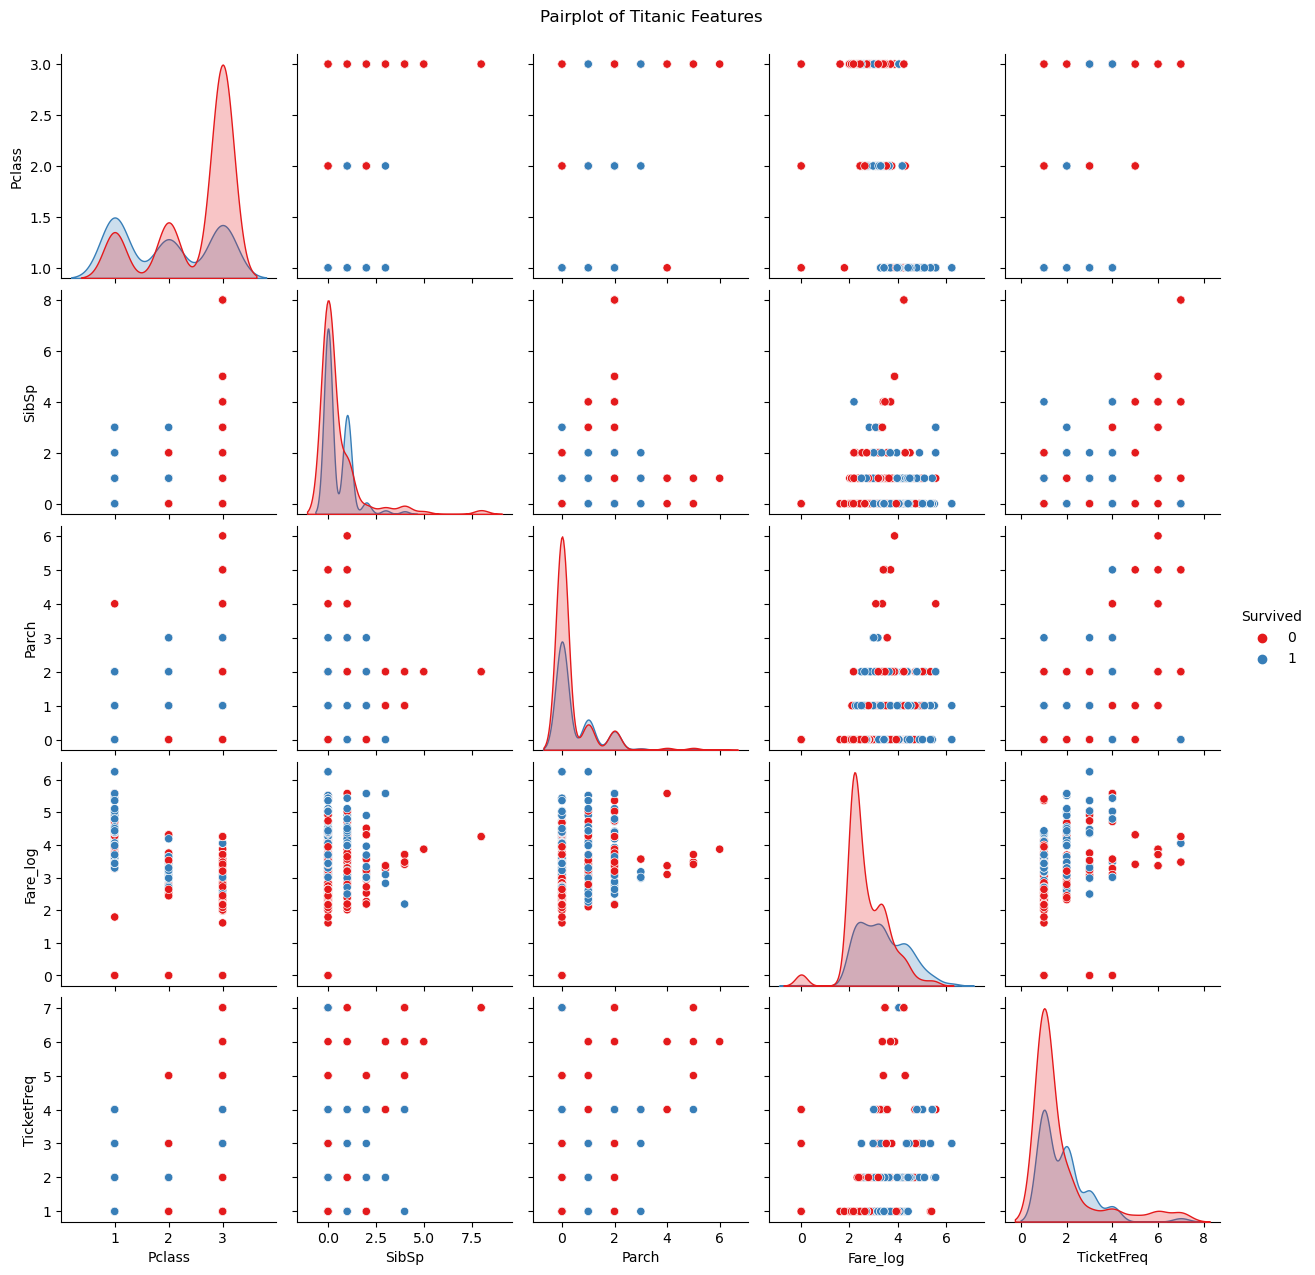

In [352]:
# Select features for pairplot
features = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare_log', 'TicketFreq']

# Pairplot with hue='Survived'
sns.pairplot(titanic_2[features], hue='Survived', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Titanic Features', y=1.02)
plt.show()

#### Observation:
The dataset has more non-survivors than survivors, indicating an imbalanced target. Survival patterns are visible for features like Pclass and Fare_log, but overall, non-survivors dominate the distributions.

In [353]:
titanic_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,CabinKnown,CabinLetter,TicketFreq,Fare_log,FamilySize
0,0,3,male,22,1,0,S,0,U,1,2.110213,2
1,1,1,female,38,1,0,C,1,C,1,4.280593,2
2,1,3,female,26,0,0,S,0,U,1,2.188856,1
3,1,1,female,35,1,0,S,1,C,2,3.990834,2
4,0,3,male,35,0,0,S,0,U,1,2.202765,1


### 4. Data Preparation and model building

#### A. One Hot Encoading (OHE)

In [354]:
# Copy the dataframe
titanic_3 = titanic_2.copy()

# Identify object-type categorical columns
cat_cols = titanic_3.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
titanic_encoded = pd.get_dummies(titanic_3, columns=cat_cols, drop_first=True)

# Identify boolean columns
bool_cols = titanic_encoded.select_dtypes(include='bool').columns

# Convert boolean columns to int
titanic_encoded[bool_cols] = titanic_encoded[bool_cols].astype(int)

# Check the result
titanic_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,CabinKnown,TicketFreq,Fare_log,FamilySize,Sex_male,Embarked_Q,Embarked_S,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_U
0,0,3,22,1,0,0,1,2.110213,2,1,0,1,0,0,0,0,0,0,0,1
1,1,1,38,1,0,1,1,4.280593,2,0,0,0,0,1,0,0,0,0,0,0
2,1,3,26,0,0,0,1,2.188856,1,0,0,1,0,0,0,0,0,0,0,1
3,1,1,35,1,0,1,2,3.990834,2,0,0,1,0,1,0,0,0,0,0,0
4,0,3,35,0,0,0,1,2.202765,1,1,0,1,0,0,0,0,0,0,0,1


In [355]:
titanic_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Age            891 non-null    int32  
 3   SibSp          891 non-null    int64  
 4   Parch          891 non-null    int64  
 5   CabinKnown     891 non-null    int32  
 6   TicketFreq     891 non-null    int64  
 7   Fare_log       891 non-null    float64
 8   FamilySize     891 non-null    int64  
 9   Sex_male       891 non-null    int32  
 10  Embarked_Q     891 non-null    int32  
 11  Embarked_S     891 non-null    int32  
 12  CabinLetter_B  891 non-null    int32  
 13  CabinLetter_C  891 non-null    int32  
 14  CabinLetter_D  891 non-null    int32  
 15  CabinLetter_E  891 non-null    int32  
 16  CabinLetter_F  891 non-null    int32  
 17  CabinLetter_G  891 non-null    int32  
 18  CabinLette

#### B. Split the data into X and Y

In [356]:
# Features (drop the target column)
X = titanic_encoded.drop(columns=["Survived"])
# Target variable
y = titanic_encoded["Survived"]

In [357]:
# shape of the features
print(X.shape)
print(y.shape)

(891, 19)
(891,)


#### C. Split data into train and test. Keep 20% data reserved for testing

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=45)

In [359]:
# Print the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 19)
X_test shape: (179, 19)
y_train shape: (712,)
y_test shape: (179,)


#### D. Scale the model

In [360]:
num_cols = ["TicketFreq", "Fare_log", "FamilySize" ]
scaled = StandardScaler()
X_train[num_cols]= scaled.fit_transform(X_train[num_cols])
X_test[num_cols] = scaled.transform(X_test[num_cols])

#### E. Train a Supervised Learning Classification base model - Logistic Regression

In [361]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### F. Print evaluation metrics for the model and clearly share insights.

In [375]:
# Predict
y_pred = model.predict(X_test)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report: \n",class_report)
print()
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",conf_matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       117
           1       0.75      0.81      0.78        62

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.84      0.84       179


Confusion Matrix: 
 [[100  17]
 [ 12  50]]


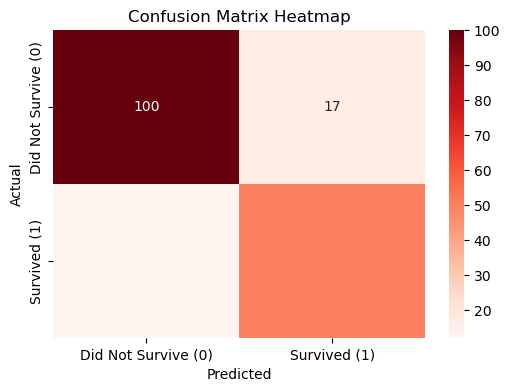

In [363]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Did Not Survive (0)','Survived (1)'], yticklabels=['Did Not Survive (0)','Survived (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

#### Observation:

1. **Confusion Matrix:**
- **Truly Negative** - 100 -> Correctly predicted as "Did not survive"
- **Falase Positive** - 17 -> Predicted "Survived" but actually did not.
- **False Negative** - 12 -> Predicted as "Did not survive" but actually did.
- **Truly Positive** - 50 -> Correclty predicted as "Survived".

2. **Classification Report:**
- **Accuracy** = 84% of predictions are correct.
- **Precision(class1)** = 75% of predicted as survived actually survived
- **Recall(class1)** = 81% of actual survived passengers correctly predicted.
- **F1 score** = 78% balance between Recall and Precision.

The model is better at predicting non-survivors (class 0) than survivors (class 1), which is common for slightly imbalanced datasets.

- Let's retrain the model using the parameter "class_weight="balanced".

#### G. Retrain the Logistic Regression Model with parameter "class_weight="balanced"

In [364]:
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced")
log_reg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

#### H. Print evaluation metrics for the model and clearly share insights.

In [365]:
# Predict
y_pred_log_reg = log_reg.predict(X_test)

# Classification Report
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Classification Report: \n",class_report_log_reg)
print()
# Confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix: \n",conf_matrix_log_reg)

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.81      0.85       117
           1       0.70      0.82      0.76        62

    accuracy                           0.82       179
   macro avg       0.80      0.82      0.80       179
weighted avg       0.83      0.82      0.82       179


Confusion Matrix: 
 [[95 22]
 [11 51]]


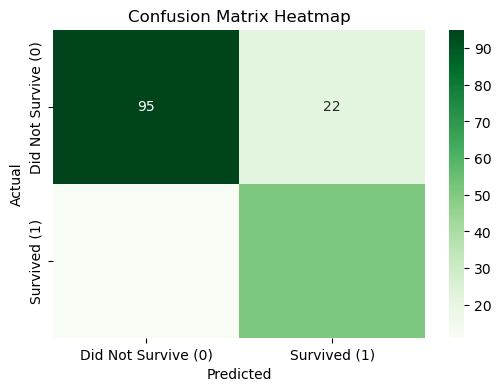

In [372]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Greens', xticklabels=['Did Not Survive (0)','Survived (1)'], yticklabels=['Did Not Survive (0)','Survived (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

#### Observation:

- **Accuracy** dropped slightly (84% → 82%) → expected, since we’re not favoring the majority class.
- **Recall for Survived (class 1)** stayed strong at **82%** (same as before).
- **Precision for Survived (class 1)** dropped a bit (75% → 70%).
- Model now **pays more attention to the minority class (survivors)**.

#### I. Lets now use SMOTE to balance the data

In [368]:
smote = SMOTE(random_state=45)
X_train_balanced,y_train_balanced = smote.fit_resample(X_train,y_train)

#### J. Retrain the Logistic Regression Model after balancing the data using SMOTE  

In [370]:
log = LogisticRegression(max_iter=1000)
log.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=1000)

#### K. Print evaluation metrics for the model and clearly share insights.

In [371]:
# # Predict
y_pred_log = log.predict(X_test)

# Classification Report
class_report_log = classification_report(y_test, y_pred_log)
print("Classification Report: \n",class_report_log)
print()
# Confusion matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix: \n",conf_matrix_log)

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       117
           1       0.72      0.82      0.77        62

    accuracy                           0.83       179
   macro avg       0.81      0.83      0.81       179
weighted avg       0.84      0.83      0.83       179


Confusion Matrix: 
 [[97 20]
 [11 51]]


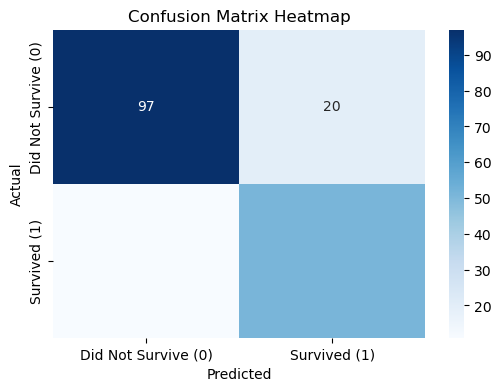

In [374]:
# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Survive (0)','Survived (1)'], yticklabels=['Did Not Survive (0)','Survived (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

#### Observation:
- **Overall Accuracy**
   - **Accuracy** is 83% (almost the same as before), which means balancing the data didn’t hurt overall performance.

- **Class 0 (Did NOT Survive)**
   - **Precision = 0.90** → When the model predicts "not survived," it is correct 90% of the time.
   - Recall = 0.83 → It correctly identifies 83% of actual non-survivors.
   - Small drop in recall compared to before balancing.

- **Class 1 (Survived)**
   - **Precision = 0.72** → When the model predicts "survived," it’s correct 72% of the time.
   - **Recall = 0.82** → It captures 82% of actual survivors (good improvement vs before!).
   - This means SMOTE helped the model detect more survivors (fewer false negatives).

- **Trade-off Between Classes**
  - **Pre-SMOTE:** Model leaned toward predicting non-survivors (majority class).
  - **Post-SMOTE:**  Recall for survivors increased from ~0.81 to 0.82, making the model fairer across both classes.
  - Precision for survivors dropped slightly (more false positives), which is the typical trade-off.

- **Confusion Matrix**
     - Out of **62 actual survivors, 51 were correctly predicted** → strong recall.
     - Out of **117 actual non-survivors, 97 were correctly predicted**.
     - SMOTE reduced the bias toward the majority class, improving balance.

#### L. Compare all three scenarios side by side (original, class_weight balanced, SMOTE)

Here’s a short comparison table for your three cases:

| Model                     | Accuracy | Precision (1) | Recall (1) | F1 (1) | Survivors caught |
| ------------------------- | -------- | ------------- | ---------- | ------ | ---------------- |
| **Original**              | 0.84     | 0.75          | 0.81       | 0.78   | 50/62            |
| **Class weight balanced** | 0.82     | 0.70          | 0.82       | 0.76   | 51/62            |
| **SMOTE**                 | 0.83     | 0.72          | 0.82       | 0.77   | 51/62            |


#### M. Conclussion

- **Original Model** → It was good at predicting deaths, but missed many survivors.
- **Balanced Weights** → Caught more survivors, but also made more mistakes.
- **SMOTE** → Best balance – it catches more survivors without losing too much accuracy.

**Conclusion: SMOTE is the best option** here because it makes the model fairer and better at finding both deaths and survivors.